# Deep Learning: Assignment 1

<ol>
<li>Take any different dataset (apart from breast cancer) that has target value binary (0 OR 1).
<li>Visualize the data using various graphs using matplotlib or sklearn python libraries.
<li>Transform data according to model requirements. HINT [MP-Neuron takes only BINARY DATA as input]
<li>Split the data for training and testing.
<li>Train MP-Neuron Model on the choosen dataset and test it on the testing set to get model accuracy.
<li>Train Perceptron Model on the choosen dataset and test it on the testing set to get model accuracy.
</ol>

### Import necessary Libraries and Dataset

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#import dataset
df = sns.load_dataset('titanic')

In [3]:
#view data
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#view data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


### EDA

In [5]:
sns.set()
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

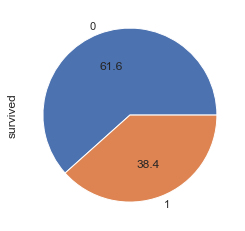

In [6]:
df.survived.value_counts().plot(kind='pie',autopct='%.1f')

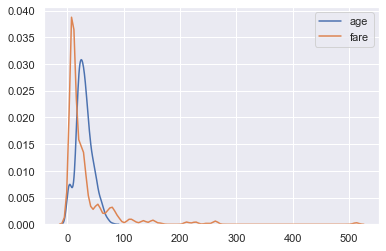

In [7]:
sns.kdeplot(df['age'])
sns.kdeplot(df['fare'])

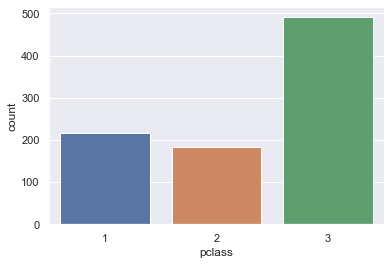

In [8]:
sns.countplot(df['pclass'])

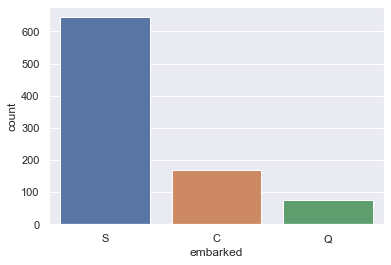

In [9]:
sns.countplot(df['embarked'])

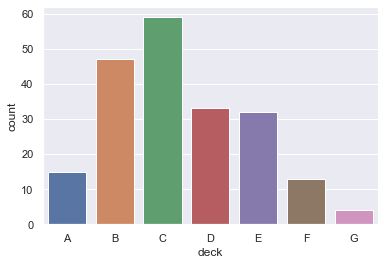

In [10]:
sns.countplot(df['deck'])

### Data Wrangling

In [11]:
#drop unnecessary columns
df.drop(['who','embark_town','adult_male','alive'], axis=1, inplace=True)

In [12]:
#view data metrics
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
#drop duplicates
df.drop_duplicates(keep='first', inplace=True)
df.shape

(784, 11)

In [14]:
#count null values
df.isna().sum()

survived      0
pclass        0
sex           0
age         106
sibsp         0
parch         0
fare          0
embarked      2
class         0
deck        582
alone         0
dtype: int64

In [15]:
#impute null values in age column with mean
df['age'].fillna(value=df['age'].mean(), inplace=True)

In [16]:
#impute null values in deck column
df['deck'] = df['deck'].cat.add_categories('Unknown')
df['deck'].fillna(value="Unknown", inplace=True)

In [17]:
#drop null values
df.dropna(inplace=True)
df.shape

(782, 11)

In [18]:
df.reset_index(drop=True, inplace=True)

**Convert to Binary Values**

In [19]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'deck', 'alone'],
      dtype='object')

In [20]:
pclass_ = pd.get_dummies(df['pclass'])
embarked_ = pd.get_dummies(df['embarked'])
sibsp_ = pd.get_dummies(df['sibsp'])
parch_ = pd.get_dummies(df['parch'])
class_ = pd.get_dummies(df['class'])
deck_ = pd.get_dummies(df['deck'])

df['Age_bins'] = pd.cut(x=df['age'], bins=[i for i in range(0,100,25)], labels=['0to25','26to50','50to75'])
age_ = pd.get_dummies(df['Age_bins'])

df['Fare_bins'] = pd.cut(x=df['fare'], bins=[i for i in range(0,600,200)], labels=['0to200','200to400'])
fare_ = pd.get_dummies(df['Fare_bins'])

In [21]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,alone,Age_bins,Fare_bins
0,0,3,male,22.0,1,0,7.2500,S,Third,Unknown,False,0to25,0to200
1,1,1,female,38.0,1,0,71.2833,C,First,C,False,26to50,0to200
2,1,3,female,26.0,0,0,7.9250,S,Third,Unknown,True,26to50,0to200
3,1,1,female,35.0,1,0,53.1000,S,First,C,False,26to50,0to200
4,0,3,male,35.0,0,0,8.0500,S,Third,Unknown,True,26to50,0to200


In [22]:
df.drop(['Age_bins','Fare_bins'], axis=1, inplace=True)

In [23]:
pclass_ = pclass_.add_suffix('_pclass')
embarked_ = embarked_.add_suffix('_embarked')
sibsp_ = sibsp_.add_suffix('_sibsp')
parch_ = parch_.add_suffix('_parch')
class_ = class_.add_suffix('_class')
deck_ = class_.add_suffix('_deck')
age_ = age_.add_suffix('_age')
fare_ = fare_.add_suffix('_fare')

In [24]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,Unknown,False
1,1,1,female,38.0,1,0,71.2833,C,First,C,False
2,1,3,female,26.0,0,0,7.9250,S,Third,Unknown,True
3,1,1,female,35.0,1,0,53.1000,S,First,C,False
4,0,3,male,35.0,0,0,8.0500,S,Third,Unknown,True


In [25]:
frames = [df['survived'], pclass_, df['sex'], age_, sibsp_, parch_, fare_, class_, deck_, df['alone']]
df_binarized = pd.concat(frames, axis=1)

df_binarized.head()

,survived,1_pclass,2_pclass,3_pclass,sex,0to25_age,26to50_age,50to75_age,0_sibsp,1_sibsp,...,6_parch,0to200_fare,200to400_fare,First_class,Second_class,Third_class,First_class_deck,Second_class_deck,Third_class_deck,alone
0,0,0,0,1,male,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,False
1,1,1,0,0,female,0,1,0,0,1,...,0,1,0,1,0,0,1,0,0,False
2,1,0,0,1,female,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,True
3,1,1,0,0,female,0,1,0,0,1,...,0,1,0,1,0,0,1,0,0,False
4,0,0,0,1,male,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,True


In [26]:
df_binarized['sex'] = df_binarized['sex'].map({'male':0, 'female':1})
df_binarized['alone'] = df_binarized['alone'].map({False:0, True:1})

In [27]:
print(df_binarized.shape)
df_binarized.head()

(782, 31)


,survived,1_pclass,2_pclass,3_pclass,sex,0to25_age,26to50_age,50to75_age,0_sibsp,1_sibsp,...,6_parch,0to200_fare,200to400_fare,First_class,Second_class,Third_class,First_class_deck,Second_class_deck,Third_class_deck,alone
0,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,1,1,0,0,1,0,1,0,0,1,...,0,1,0,1,0,0,1,0,0,0
2,1,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,1
3,1,1,0,0,1,0,1,0,0,1,...,0,1,0,1,0,0,1,0,0,0
4,0,0,0,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,1


### Train Test Split Data

In [28]:
x = df.drop('survived', axis=1)
x_b = df_binarized.drop('survived', axis=1)
y = df['survived']

**Binarized Values Split**

In [29]:
X_train_b, X_test_b, Y_train_b, Y_test_b = train_test_split(x_b, y, test_size=0.7, random_state=1)

In [30]:
print("X_train_b shape :",X_train_b.shape)
print("X_test_b shape :",X_test_b.shape)
print("Y_train_b shape :",Y_train_b.shape)
print("Y_test_b shape :",Y_test_b.shape)

X_train_b shape : (234, 30)
X_test_b shape : (548, 30)
Y_train_b shape : (234,)
Y_test_b shape : (548,)


**Real Values Split**

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.7, random_state=1)

In [32]:
print("X_train shape :",X_train.shape)
print("X_test shape :",X_test.shape)
print("Y_train shape :",Y_train.shape)
print("Y_test shape :",Y_test.shape)

X_train shape : (234, 10)
X_test shape : (548, 10)
Y_train shape : (234,)
Y_test shape : (548,)


### MP Neuron

In [33]:
b = 10

i = 326

print("For row", i)

if (np.sum(X_train_b.loc[i]) >= b):
    print("MP Neuron inference is 0")
else:
    print("MP Neuron inference is 1")

if (Y_train_b[i] == 1):
    print("Ground Truth is 0")
else:
    print("Ground truth is 1")

For row 326
MP Neuron inference is 1
Ground truth is 1


In [34]:
b = 10

Y_pred_train = []
accurate_rows = 0

for i in X_train_b.index:
    x = X_train_b.loc[i]
    y = Y_train_b.loc[i]
    y_pred = (np.sum(x) >= b)
    Y_pred_train.append(y_pred)
    accurate_rows += (y == y_pred)

print(accurate_rows, accurate_rows/X_train_b.shape[0])

124 0.5299145299145299


In [35]:
for b in range(X_train_b.shape[1] + 1):
    Y_pred_train = []
    accurate_rows = 0

    for i in X_train_b.index:
        x = X_train_b.loc[i]
        y = Y_train_b.loc[i]
        y_pred = (np.sum(x) >= b)
        Y_pred_train.append(y_pred)
        accurate_rows += (y == y_pred)

    print(b, accurate_rows, round(accurate_rows/X_train_b.shape[0],4))

0 110 0.4701
1 110 0.4701
2 110 0.4701
3 110 0.4701
4 110 0.4701
5 110 0.4701
6 110 0.4701
7 110 0.4701
8 128 0.547
9 156 0.6667
10 124 0.5299
11 124 0.5299
12 124 0.5299
13 124 0.5299
14 124 0.5299
15 124 0.5299
16 124 0.5299
17 124 0.5299
18 124 0.5299
19 124 0.5299
20 124 0.5299
21 124 0.5299
22 124 0.5299
23 124 0.5299
24 124 0.5299
25 124 0.5299
26 124 0.5299
27 124 0.5299
28 124 0.5299
29 124 0.5299
30 124 0.5299


In [36]:
b = 9

Y_pred_test = []

for i in X_test_b.index:
    y_pred = (np.sum(X_test_b.loc[i]) >= b)
    Y_pred_test.append(y_pred)
    
accuracy = round(accuracy_score(Y_pred_test, Y_test),4)
print(b,accuracy)

9 0.6642


**MP Neuron Class**

In [37]:
class MPNeuron:
    
    def __init__(self):
        self.b = None
    
    def model(self, x):
        return(sum(x) >= self.b)
    
    def predict(self, X):
        Y = []
        for i in X.index:
            result = self.model(X.loc[i])
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y):
        accuracy = {}
        print(type(X.shape[1]))
        for b in range(X.shape[1]+1):
            self.b = b
            Y_pred = self.predict(X)
            accuracy[b] = accuracy_score(Y_pred, Y)
        
        best_b = max(accuracy,key = accuracy.get)
        self.b = best_b
        
        print('Optimal Value of  is', best_b)
        print('Highest accuracy is',round(accuracy[best_b],4))

**Fit MP Neuron Class and Predict Results**

In [38]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_train_b, Y_train_b)

<class 'int'>
Optimal Value of  is 9
Highest accuracy is 0.6667


In [39]:
Y_test_pred = mp_neuron.predict(X_test_b)
accuracy_test = round(accuracy_score(Y_test_pred, Y_test_b),4)

print(accuracy_test)

0.6642


### Perceptron

**Perceptron Class**

In [40]:
class Perceptron:
    
    def __init__ (self):
        self.w = None
        self.b = None
    
    def model(self, x):
        #print(x)
        return 1 if ((np.dot(self.w, x)) >= self.b) else 0
    
    def predict(self, X):
        Y = []
        for i in X.index:
            result = self.model(X.loc[i])
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y, epochs = 1, lr = 1):
        self.w = np.ones(X.shape[1])
        self.b = 0
        accuracy = {}
        max_accuracy = 0
        for i in range(epochs):
            for index_ in X.index:
                #print(X.loc[index_])
                #print(self.w)
                y_pred = self.model(X.loc[index_])
                #print(y_pred)
                if ((Y.loc[index_] == 1) and (y_pred == 0)):
                    self.w = self.w + lr * x
                    self.b = self.b - lr * 1
                elif ((Y.loc[index_] == 0) and (y_pred == 1)):
                    self.w = self.w - lr * x
                    self.b = self.b + lr * 1
                    
            accuracy[i] = accuracy_score(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                chkptw = self.w
                chkptb = self.b

        self.w = chkptw
        self.b = chkptb
        
        print("Max Accuracy", round(max_accuracy,4))
        

**Fit Perceptron Class and Predict Results**

In [41]:
perceptron = Perceptron()
perceptron.fit(X_train_b, Y_train_b, 10, 0.1)

Max Accuracy 0.6795


In [42]:
Y_pred_test = perceptron.predict(X_test_b)
print(round(accuracy_score(Y_pred_test, Y_test_b),4))

0.7427
